In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [123]:
rec = pd.read_csv('rec.csv')

In [124]:
proc = pd.read_csv('proc.csv')

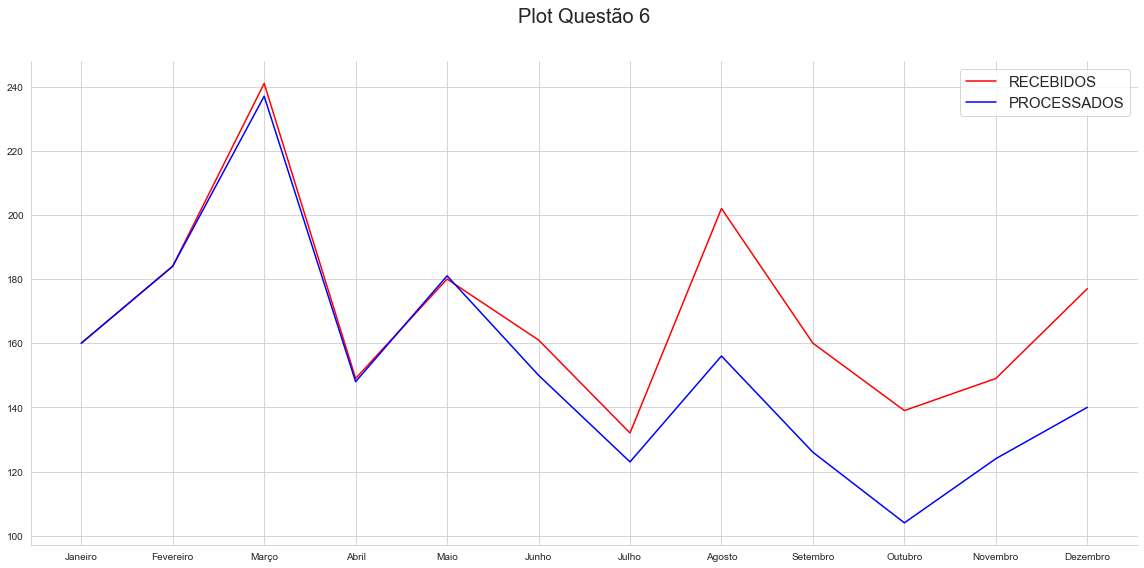

In [125]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(y= rec.values[0], x=rec.columns.to_list(), color='red', label='RECEBIDOS')
ax2 = sns.lineplot(y= proc.values[0], x=proc.columns.to_list(), color='blue', label='PROCESSADOS')
plt.legend(fontsize=15)
plt.title('Plot Questão 6', fontsize = 20, pad = 40)
plt.tight_layout()
sns.despine()
plt.savefig('questao6.png')

In [127]:
df=pd.read_csv('texto-classe.csv')

In [128]:
df

,Texto,Classe
0,They are novels,stmt
1,have you read this book,question
2,who is the author,question
3,what are the characters,question
4,This is how I bought the book,stmt
5,I like fictions,stmt
6,what is your favorite book,question
7,This is my book,stmt


In [97]:
Features = df.Texto

In [86]:
y = df.Classe

In [88]:
y = y.replace(['stmt','question'], [0,1])

In [89]:
y

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
Name: Classe, dtype: int64

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(Features)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
forest = RandomForestClassifier().fit(X,y)

In [107]:
def predict(model, sentence):
    if model.predict(tfidf.transform([sentence])) == 1:
        return('question')
    if model.predict(tfidf.transform([sentence])) == 0:
        return('stmt')

In [108]:
predict(forest, 'what do you mean')

'question'